In [2]:

import pandas as pd

file_path = '../cl_JUIN_2013-complet3.csv'  # Use '..' to go up one level

df = pd.read_csv(file_path, encoding='ISO-8859-1', sep=';')

df.head()


,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

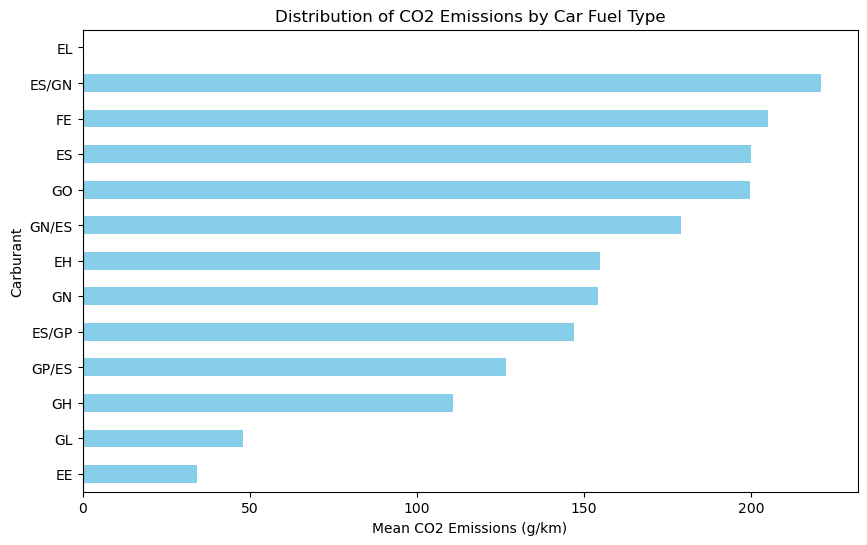

In [4]:
#Distribution of CO2 Emissions by Car Fuel Type
import matplotlib.pyplot as plt

fuel_type_co2 = df.groupby('Carburant')['CO2 (g/km)'].mean()

plt.figure(figsize=(10, 6))
fuel_type_co2.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Mean CO2 Emissions (g/km)')
plt.title('Distribution of CO2 Emissions by Car Fuel Type')
plt.show()


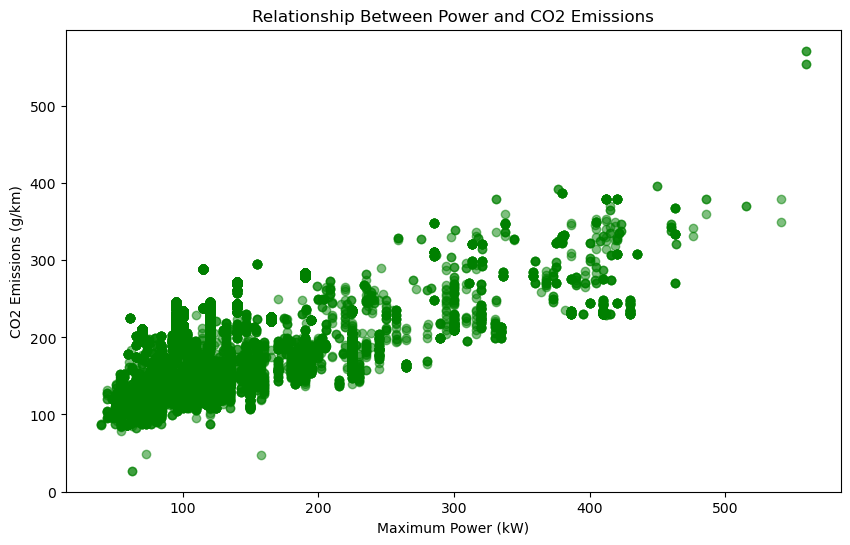

In [5]:
# Relationship Between Power and CO2 Emissions

plt.figure(figsize=(10, 6))
plt.scatter(df['Puissance maximale (kW)'], df['CO2 (g/km)'], alpha=0.5, color='green')
plt.xlabel('Maximum Power (kW)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('Relationship Between Power and CO2 Emissions')
plt.show()


In [6]:
# relationsship between Consommation mixte (l/100km) vs. CO2 (g/km)

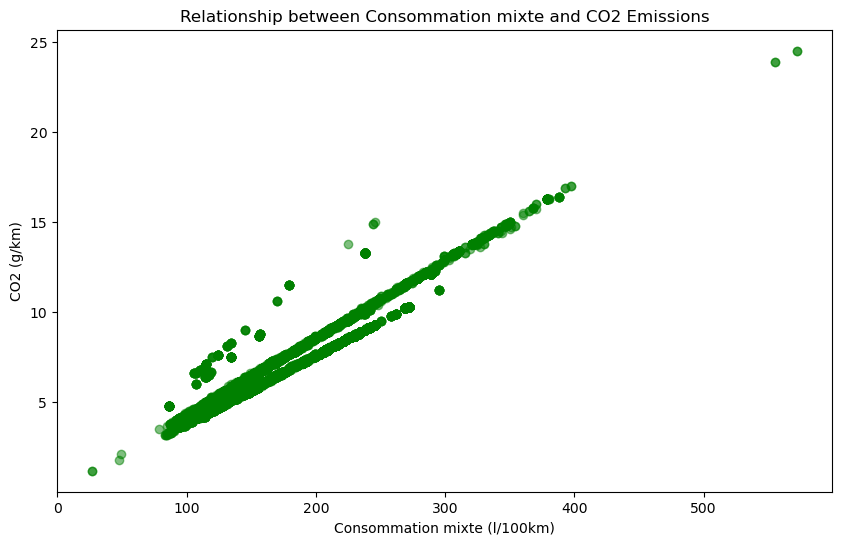

In [7]:
# subset DataFrame with relevant columns

subset_df = df[['Consommation mixte (l/100km)', 'CO2 (g/km)']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(subset_df['CO2 (g/km)'], subset_df['Consommation mixte (l/100km)'],color='green', alpha=0.5)
plt.title('Relationship between Consommation mixte and CO2 Emissions')
plt.xlabel('Consommation mixte (l/100km)')
plt.ylabel('CO2 (g/km)')
#plt.grid(True)
plt.show()

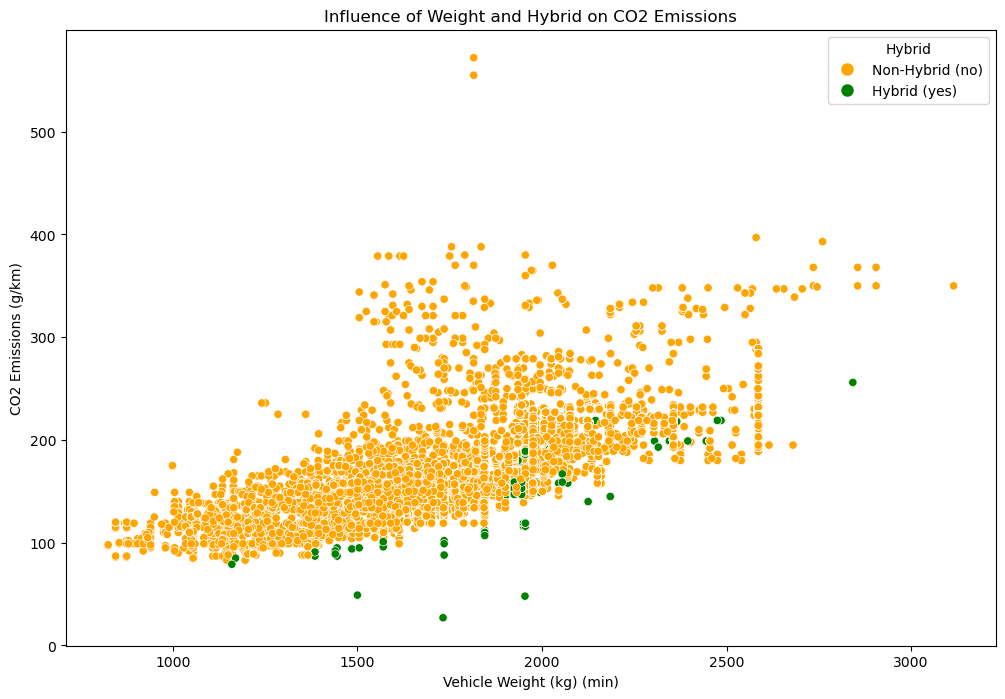

In [8]:
import seaborn as sns

# Create a scatter plot with different colors for Hybrid and Non-Hybrid
plt.figure(figsize=(12, 8))
sns.scatterplot(x='masse vide euro min (kg)', y='CO2 (g/km)', hue='Hybride', data=df, palette={'non': 'orange', 'oui': 'green'})
plt.title('Influence of Weight and Hybrid on CO2 Emissions')
plt.xlabel('Vehicle Weight (kg) (min)')
plt.ylabel('CO2 Emissions (g/km)')

legend_labels = ['Non-Hybrid (no)', 'Hybrid (yes)']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)]
plt.legend(legend_handles, legend_labels, title='Hybrid', loc='upper right')
plt.show()

In [9]:
average_co2_non_hybrid = df[df['Hybride'] == 'non']['CO2 (g/km)'].mean()
average_co2_hybrid = df[df['Hybride'] == 'oui']['CO2 (g/km)'].mean()

print(f"average_co2_non_hybrid: {average_co2_non_hybrid:.2f} g/km")
print(f"average_co2_hybrid: {average_co2_hybrid:.2f} g/km")


average_co2_non_hybrid: 199.23 g/km
average_co2_hybrid: 143.58 g/km


In [10]:
categorical_variables = [
    'Boîte de vitesse',
    'Champ V9'
]

for variable in categorical_variables:
    if df[variable].dtype == 'object':
        unique_categories = df[variable].unique()
        print(f"categore: {variable}: {list(unique_categories)}")
        print("\n")
    
quantitative_variables = [
    'Puissance maximale (kW)',
    'Consommation urbaine (l/100km)',
    'Consommation extra-urbaine (l/100km)',
    'Consommation mixte (l/100km)',
    'CO2 (g/km)',
    'CO type I (g/km)',
    'HC (g/km)',
    'NOX (g/km)',
    'HC+NOX (g/km)'
]

# Calculate descriptive statistics for each quantitative variable
for variable in quantitative_variables:
    print(f"\nStatistics for {variable}:")
    print(df[variable].describe())

categore: Boîte de vitesse: ['M 6', 'D 6', 'M 5', 'V 0', 'A 6', 'A 7', 'A 8', 'A 4', 'A 5', 'D 7', 'D 5', 'A 0', 'S 6', 'N 0', 'M 7', 'N 1']


categore: Champ V9: ['715/2007*692/2008EURO5', '715/2007*630/2012EURO5', '715/2007*630/2012EURO6', '715/2007*566/2011EURO5', '715/2007*459/2012EURO5', '715/2007*566/2011EURO6', '715/2007*459/2012EURO6', nan, '2005/55*2008/74EURO5', '715/2007*692/2008EURO6', '2005/55*2008/74EEV', '715/2007*566/2011EURO', '715/2007*459/2012EUR', '715/2007*459/2012EURO']



Statistics for Puissance maximale (kW):
count    44850.000000
mean       124.780834
std         49.158804
min         10.000000
25%        100.000000
50%        120.000000
75%        125.000000
max        559.300000
Name: Puissance maximale (kW), dtype: float64

Statistics for Consommation urbaine (l/100km):
count    44808.000000
mean         9.706744
std          2.366181
min          0.000000
25%          8.800000
50%          9.800000
75%         10.700000
max         41.100000
Name: Consomma

In [11]:
quantitative_column = 'Puissance administrative'
statistics = df[quantitative_column].describe()
print(statistics)

count    44850.000000
mean        11.018997
std          5.554475
min          1.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         81.000000
Name: Puissance administrative, dtype: float64


In [12]:
categorical_column = 'Marque'

value_counts = df[categorical_column].value_counts()

print(value_counts)


MERCEDES-BENZ                38450
VOLKSWAGEN                     900
FIAT                           607
OPEL                           586
BMW                            525
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
MAZDA                          193
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
HYUNDAI                         52
SMART                           52
LANCIA              

In [13]:
categorical_columns = ['Marque', 'Modèle dossier', 'Modèle UTAC', 'Désignation commerciale', 'CNIT', 'Type Variante Version (TVV)', 'Carburant', 'Hybride']

for column in categorical_columns:
    num_categories = df[column].nunique()
    print(f"\n{column} has {num_categories} categories.")



Marque has 51 categories.

Modèle dossier has 458 categories.

Modèle UTAC has 419 categories.

Désignation commerciale has 3582 categories.

CNIT has 44191 categories.

Type Variante Version (TVV) has 28781 categories.

Carburant has 13 categories.

Hybride has 2 categories.


In [14]:
categorical_column = 'Modèle dossier'

value_counts = df[categorical_column].value_counts()

print(value_counts)

VIANO               14031
VITO                 9890
SPRINTER             8323
CLASSE E             2849
CLASSE C             1302
                    ...  
RS 6 AVANT              1
GRANCABRIO              1
GRANCABRIO SPORT        1
GRANCABRIO MC           1
FF                      1
Name: Modèle dossier, Length: 458, dtype: int64


In [15]:
categorical_column = 'Modèle dossier'

value_counts = df[categorical_column].value_counts()

print(value_counts)

VIANO               14031
VITO                 9890
SPRINTER             8323
CLASSE E             2849
CLASSE C             1302
                    ...  
RS 6 AVANT              1
GRANCABRIO              1
GRANCABRIO SPORT        1
GRANCABRIO MC           1
FF                      1
Name: Modèle dossier, Length: 458, dtype: int64


In [16]:
missing_values = df.isnull().sum() / len(df) * 100

# Create a DataFrame to display the missing values information
missing_values_info = pd.DataFrame({'Column Name': df.columns,
                                    'Percentage of Missing Values': missing_values})

# Sort the DataFrame by the percentage of missing values (descending order)
missing_values_info = missing_values_info.sort_values(by='Percentage of Missing Values', ascending=False)

# Display the missing values information
print(missing_values_info)

                                                               Column Name  \
HC (g/km)                                                        HC (g/km)   
HC+NOX (g/km)                                                HC+NOX (g/km)   
Particules (g/km)                                        Particules (g/km)   
NOX (g/km)                                                      NOX (g/km)   
CO type I (g/km)                                          CO type I (g/km)   
Champ V9                                                          Champ V9   
Consommation urbaine (l/100km)              Consommation urbaine (l/100km)   
Consommation extra-urbaine (l/100km)  Consommation extra-urbaine (l/100km)   
Consommation mixte (l/100km)                  Consommation mixte (l/100km)   
CO2 (g/km)                                                      CO2 (g/km)   
Carrosserie                                                    Carrosserie   
Date de mise à jour                                    Date de m

count    44850.000000
mean        11.018997
std          5.554475
min          1.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         81.000000
Name: Puissance administrative, dtype: float64


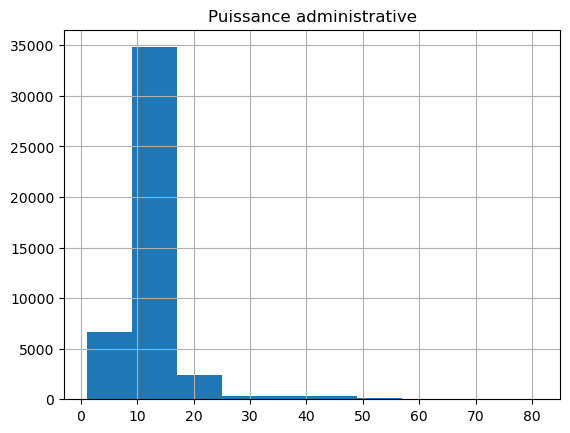

count    44850.000000
mean       124.780834
std         49.158804
min         10.000000
25%        100.000000
50%        120.000000
75%        125.000000
max        559.300000
Name: Puissance maximale (kW), dtype: float64


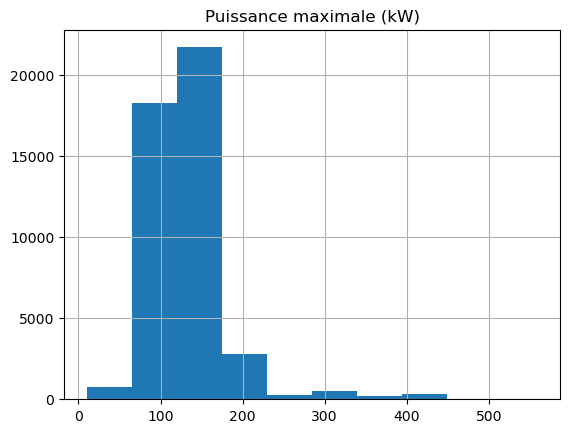

count    44808.000000
mean         9.706744
std          2.366181
min          0.000000
25%          8.800000
50%          9.800000
75%         10.700000
max         41.100000
Name: Consommation urbaine (l/100km), dtype: float64


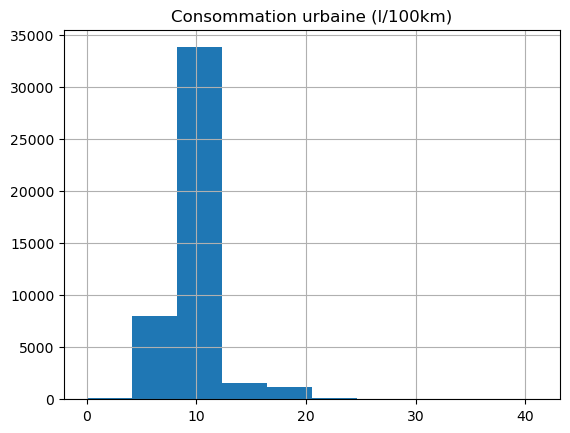

count    44808.000000
mean         6.567634
std          1.196234
min          2.800000
25%          6.300000
50%          6.700000
75%          7.100000
max         14.900000
Name: Consommation extra-urbaine (l/100km), dtype: float64


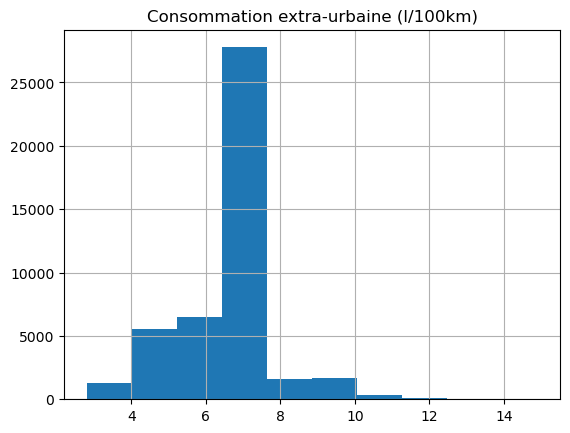

count    44811.000000
mean         7.716254
std          1.597110
min          1.200000
25%          7.200000
50%          7.700000
75%          8.400000
max         24.500000
Name: Consommation mixte (l/100km), dtype: float64


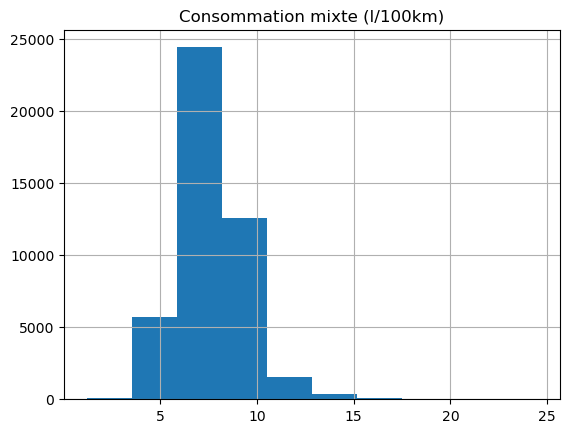

count    44811.000000
mean       198.910892
std         39.014678
min         27.000000
25%        187.000000
50%        203.000000
75%        221.000000
max        572.000000
Name: CO2 (g/km), dtype: float64


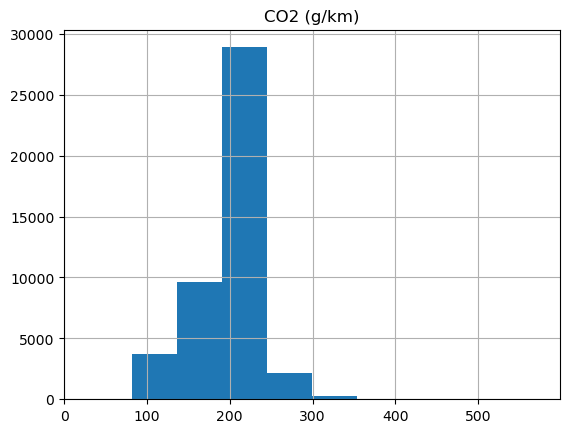

count    44547.000000
mean         0.153461
std          0.138984
min          0.005000
25%          0.046000
50%          0.093000
75%          0.222000
max          0.968000
Name: CO type I (g/km), dtype: float64


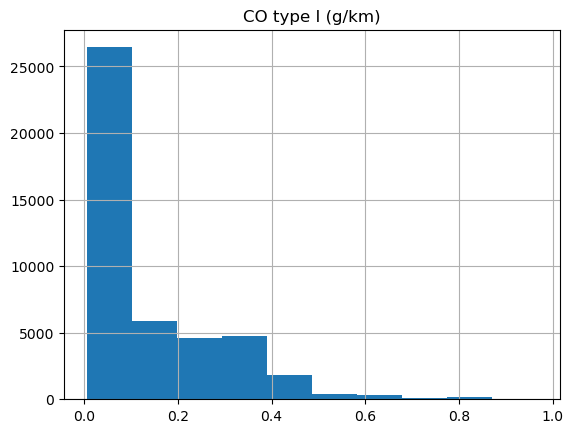

count    10403.000000
mean         0.030499
std          0.018408
min          0.008000
25%          0.008000
50%          0.031000
75%          0.044000
max          0.143000
Name: HC (g/km), dtype: float64


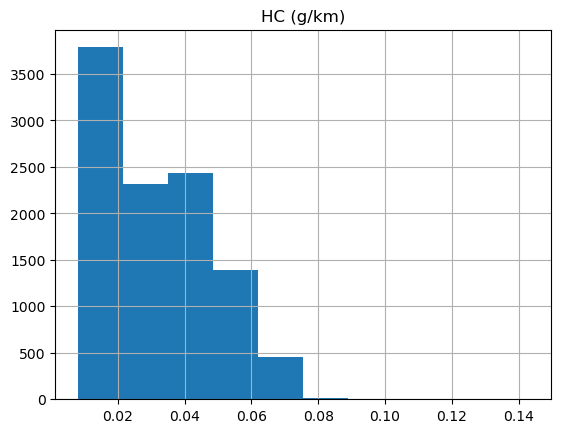

count    44547.000000
mean         0.311837
std          0.463112
min          0.001000
25%          0.158000
50%          0.197000
75%          0.228000
max          1.846000
Name: NOX (g/km), dtype: float64


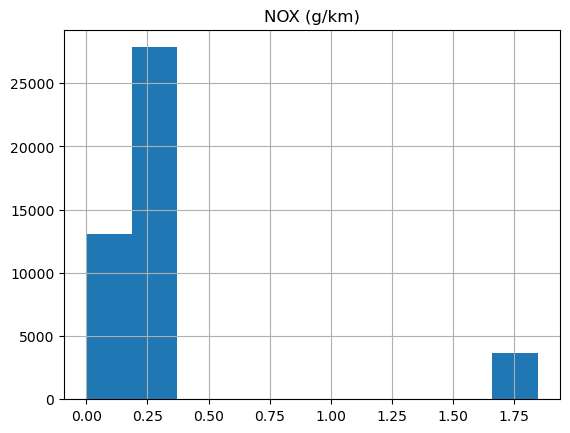

count    34191.000000
mean         0.224788
std          0.041681
min          0.038000
25%          0.201000
50%          0.220000
75%          0.248000
max          0.306000
Name: HC+NOX (g/km), dtype: float64


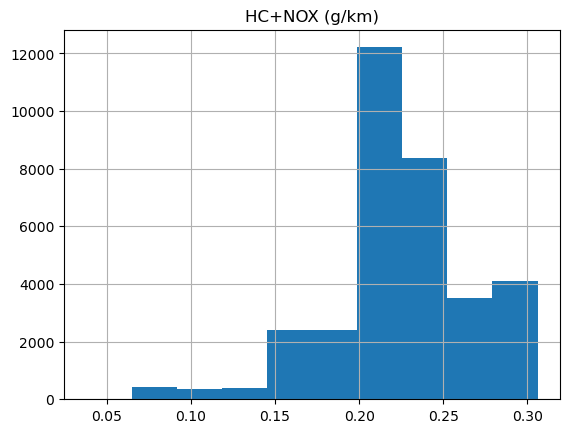

count    41708.000000
mean         0.000961
std          0.006469
min          0.000000
25%          0.000000
50%          0.001000
75%          0.001000
max          0.610000
Name: Particules (g/km), dtype: float64


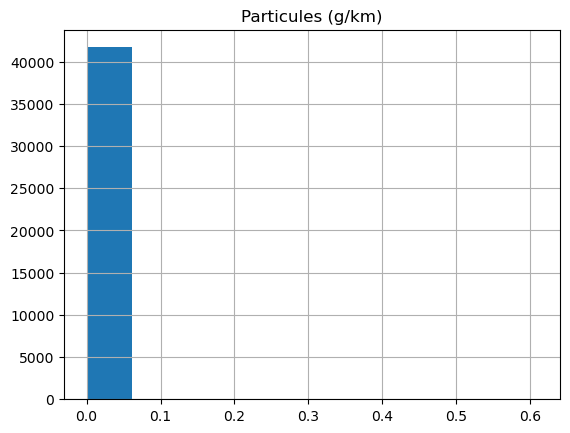

count    44850.000000
mean      2070.961650
std        342.872975
min        825.000000
25%       1976.000000
50%       2076.000000
75%       2256.000000
max       3115.000000
Name: masse vide euro min (kg), dtype: float64


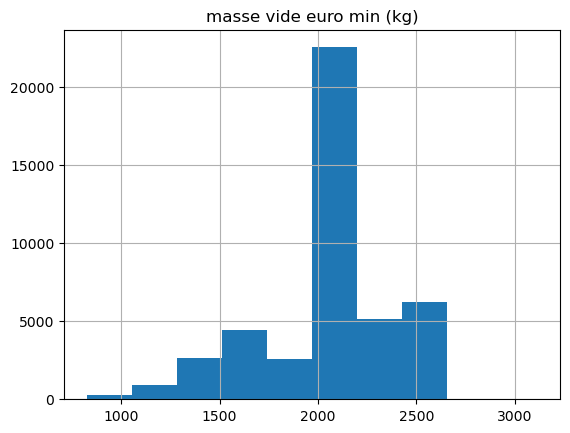

count    44850.000000
mean      2169.545284
std        410.600541
min        825.000000
25%       2043.500000
50%       2185.000000
75%       2355.000000
max       3115.000000
Name: masse vide euro max (kg), dtype: float64


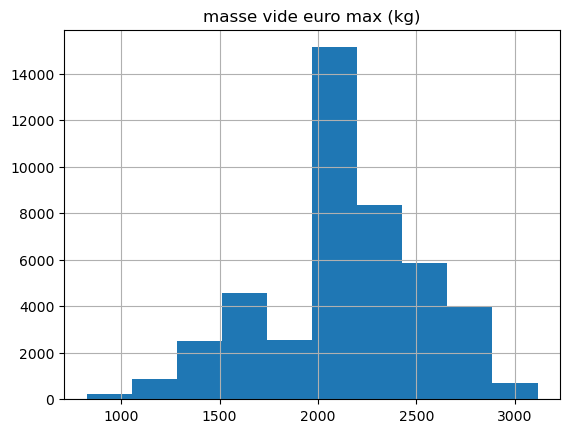

Marque ['ALFA-ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'CADILLAC' 'CHEVROLET'
 'CITROEN' 'DACIA' 'DANGEL' 'FERRARI' 'FIAT' 'FORD' 'HONDA' 'HYUNDAI'
 'INFINITI' 'JAGUAR' 'JAGUAR LAND ROVER LIMITED' 'JEEP' 'KIA' 'LADA'
 'LAMBORGHINI' 'LANCIA' 'LEXUS' 'LOTUS' 'MASERATI' 'MAYBACH' 'MAZDA'
 'MERCEDES AMG' 'MERCEDES-BENZ' 'MIA' 'MINI' 'MITSUBISHI' 'NISSAN' 'OPEL'
 'PEUGEOT' 'PORSCHE' 'QUATTRO' 'RENAULT' 'RENAULT TECH' 'ROLLS-ROYCE'
 'SEAT' 'SKODA' 'SMART' 'SSANGYONG' 'SUBARU' 'SUZUKI' 'TESLA' 'TOYOTA'
 'VOLKSWAGEN' 'VOLVO']
Modèle dossier ['159' 'AR8C SPIDER' 'BRERA' 'GIULIETTA' 'MITO' 'SPIDER' 'CYGNET' 'DB9'
 'DB9 VOLANTE' 'ONE-77' 'RAPIDE S' 'VANQUISH' 'V8 VANTAGE ROADSTER'
 'V8 VANTAGE' 'V12 VANTAGE' 'V12 VANTAGE ROADSTER' 'VANTAGE' 'V12 ZAGATO'
 'A1' 'A1 SPORTBACK' 'A1 QUATTRO' 'A3 CABRIOLET' 'A3' 'A4 AVANT'
 'RS4 AVANT' 'S4 AVANT' 'A4 ALLROAD QUATTRO' 'A4 LIMOUSINE' 'S4 LIMOUSINE'
 'A5 COUPE' 'RS5 COUPE' 'S5 COUPE' 'RS5 CABRIOLET' 'A5 CABRIOLET'
 'S5 CABRIOLET' 'A5 SPORTBACK' 'S5 SP

In [17]:
# Check for inconsistencies, errors, or anomalies in numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    # Summary statistics
    print(df[col].describe())
    # Visualize distribution
    df[col].hist()
    plt.title(col)
    plt.show()

# Examine categorical variables for inconsistencies
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Check unique values
    print(col, df[col].unique())

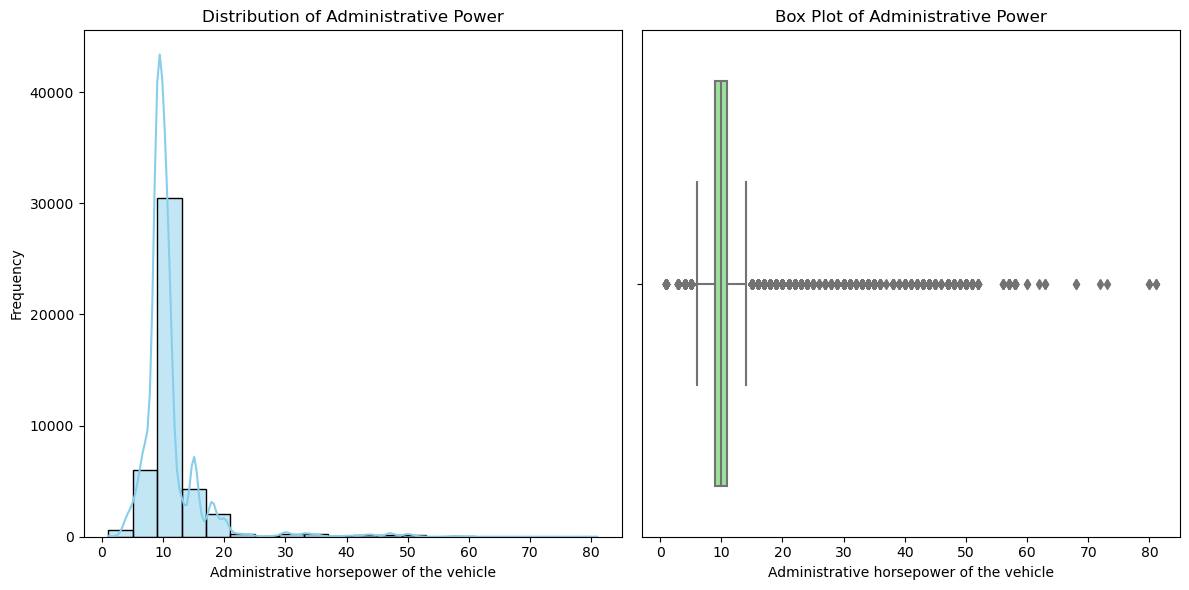

In [18]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Administrative Power
plt.subplot(1, 2, 1)
sns.histplot(df['Puissance administrative'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Administrative Power')
plt.xlabel('Administrative horsepower of the vehicle')
plt.ylabel('Frequency')

# Box plot of Administrative Power
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Puissance administrative'], color='lightgreen')
plt.title('Box Plot of Administrative Power')
plt.xlabel('Administrative horsepower of the vehicle')

# Show the plots
plt.tight_layout()
plt.show()


In [19]:
# Calculate the interquartile range (IQR)
Q1 = df['Puissance administrative'].quantile(0.25)
Q3 = df['Puissance administrative'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Puissance administrative'] < lower_bound) | (df['Puissance administrative'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['Puissance administrative'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['Puissance administrative'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Number of outliers: 7813
Lower whisker: 6.0
Upper whisker: 14.0


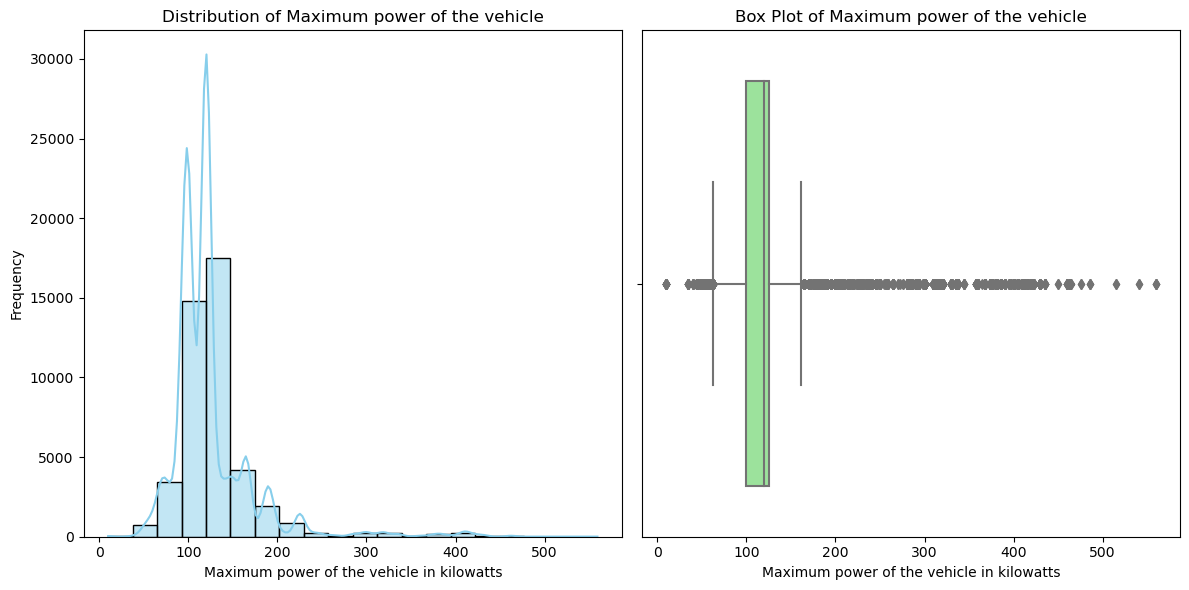

In [20]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Maximum power of the vehicle
plt.subplot(1, 2, 1)
sns.histplot(df['Puissance maximale (kW)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Maximum power of the vehicle')
plt.xlabel('Maximum power of the vehicle in kilowatts')
plt.ylabel('Frequency')

# Box plot of Maximum power of the vehicle
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Puissance maximale (kW)'], color='lightgreen')
plt.title('Box Plot of Maximum power of the vehicle')
plt.xlabel('Maximum power of the vehicle in kilowatts')

# Show the plots
plt.tight_layout()
plt.show()


In [21]:
# Calculate the interquartile range (IQR)
Q1 = df['Puissance maximale (kW)'].quantile(0.25)
Q3 = df['Puissance maximale (kW)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Puissance maximale (kW)'] < lower_bound) | (df['Puissance maximale (kW)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['Puissance maximale (kW)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['Puissance maximale (kW)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)


Number of outliers: 7259
Lower whisker: 62.5
Upper whisker: 162.5


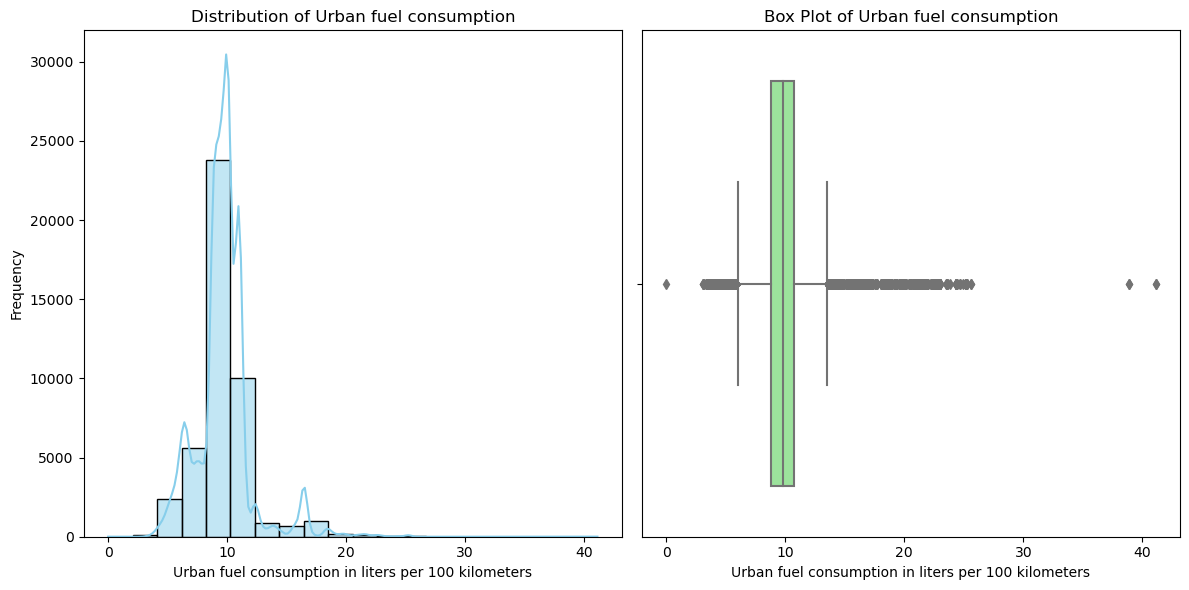

In [22]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Urban fuel consumption
plt.subplot(1, 2, 1)
sns.histplot(df['Consommation urbaine (l/100km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Urban fuel consumption')
plt.xlabel('Urban fuel consumption in liters per 100 kilometers')
plt.ylabel('Frequency')

# Box plot of Urban fuel consumption
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Consommation urbaine (l/100km)'], color='lightgreen')
plt.title('Box Plot of Urban fuel consumption')
plt.xlabel('Urban fuel consumption in liters per 100 kilometers')

# Show the plots
plt.tight_layout()
plt.show()

In [23]:
# Calculate the interquartile range (IQR)
Q1 = df['Consommation urbaine (l/100km)'].quantile(0.25)
Q3 = df['Consommation urbaine (l/100km)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Consommation urbaine (l/100km)'] < lower_bound) | (df['Consommation urbaine (l/100km)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['Consommation urbaine (l/100km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['Consommation urbaine (l/100km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)


Number of outliers: 4210
Lower whisker: 5.950000000000003
Upper whisker: 13.549999999999997


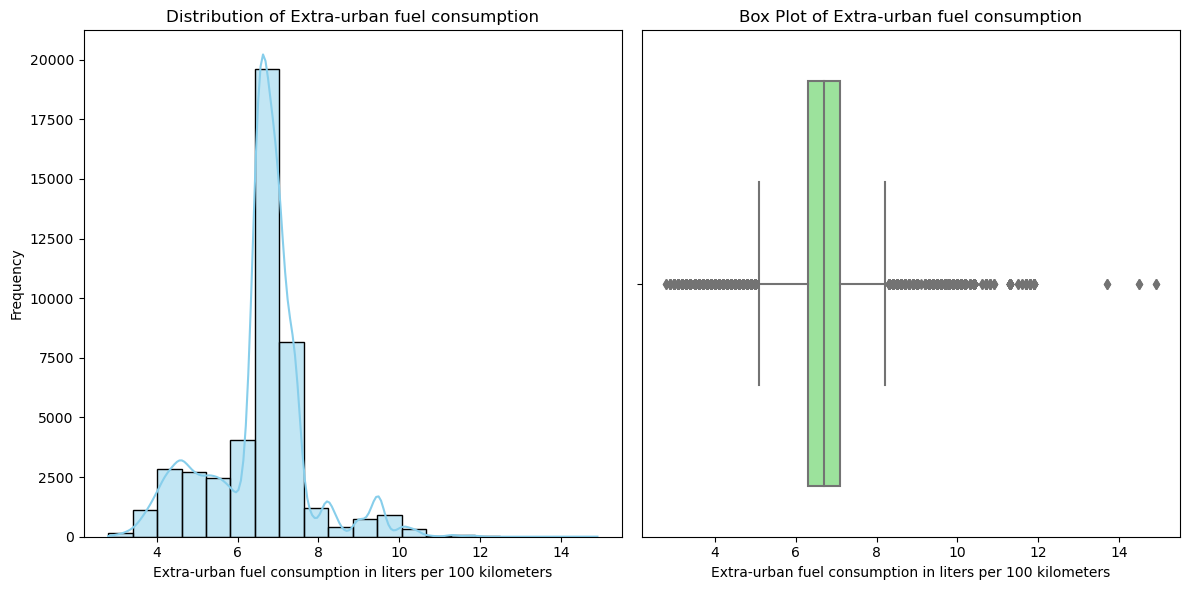

In [24]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Extra-urban fuel consumption
plt.subplot(1, 2, 1)
sns.histplot(df['Consommation extra-urbaine (l/100km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Extra-urban fuel consumption')
plt.xlabel('Extra-urban fuel consumption in liters per 100 kilometers')
plt.ylabel('Frequency')

# Box plot of Extra-urban fuel consumption
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Consommation extra-urbaine (l/100km)'], color='lightgreen')
plt.title('Box Plot of Extra-urban fuel consumption')
plt.xlabel('Extra-urban fuel consumption in liters per 100 kilometers')

# Show the plots
plt.tight_layout()
plt.show()


In [25]:
# Calculate the interquartile range (IQR)
Q1 = df['Consommation extra-urbaine (l/100km)'].quantile(0.25)
Q3 = df['Consommation extra-urbaine (l/100km)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Consommation extra-urbaine (l/100km)'] < lower_bound) | (df['Consommation extra-urbaine (l/100km)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['Consommation extra-urbaine (l/100km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['Consommation extra-urbaine (l/100km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)


Number of outliers: 8546
Lower whisker: 5.1
Upper whisker: 8.299999999999999


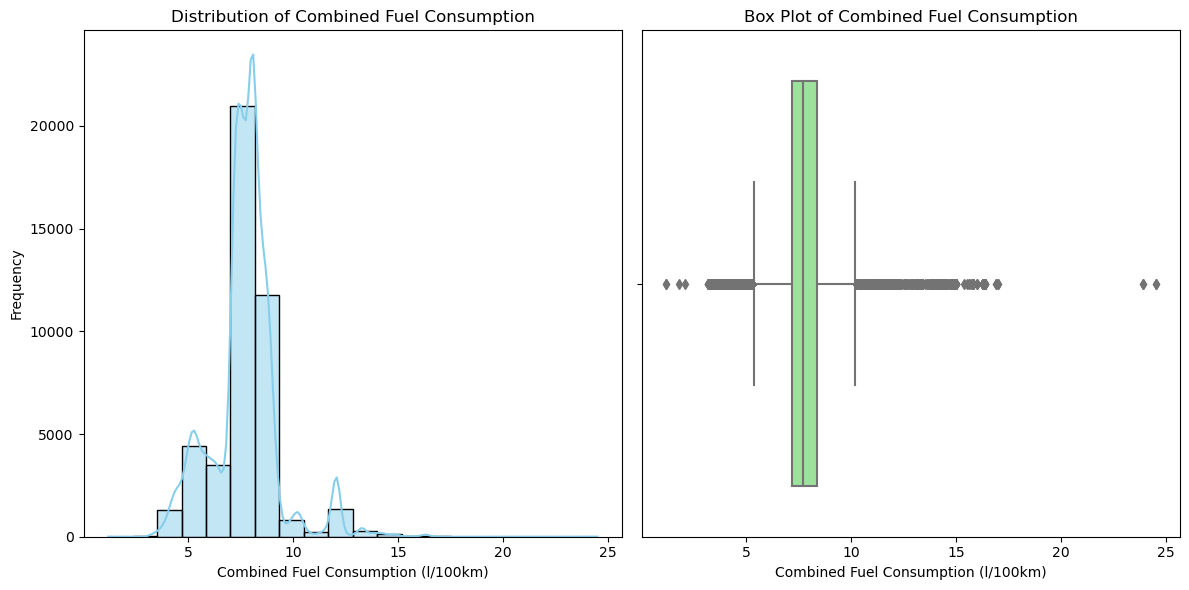

In [26]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Combined Fuel Consumption
plt.subplot(1, 2, 1)
sns.histplot(df['Consommation mixte (l/100km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Combined Fuel Consumption')
plt.xlabel('Combined Fuel Consumption (l/100km)')
plt.ylabel('Frequency')

# Box plot of Combined Fuel Consumption
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Consommation mixte (l/100km)'], color='lightgreen')
plt.title('Box Plot of Combined Fuel Consumption')
plt.xlabel('Combined Fuel Consumption (l/100km)')

# Show the plots
plt.tight_layout()
plt.show()

In [27]:
# Calculate the interquartile range (IQR)
Q1 = df['Consommation mixte (l/100km)'].quantile(0.25)
Q3 = df['Consommation mixte (l/100km)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Consommation mixte (l/100km)'] < lower_bound) | (df['Consommation mixte (l/100km)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['Consommation mixte (l/100km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['Consommation mixte (l/100km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)


Number of outliers: 6254
Lower whisker: 5.4
Upper whisker: 10.200000000000001


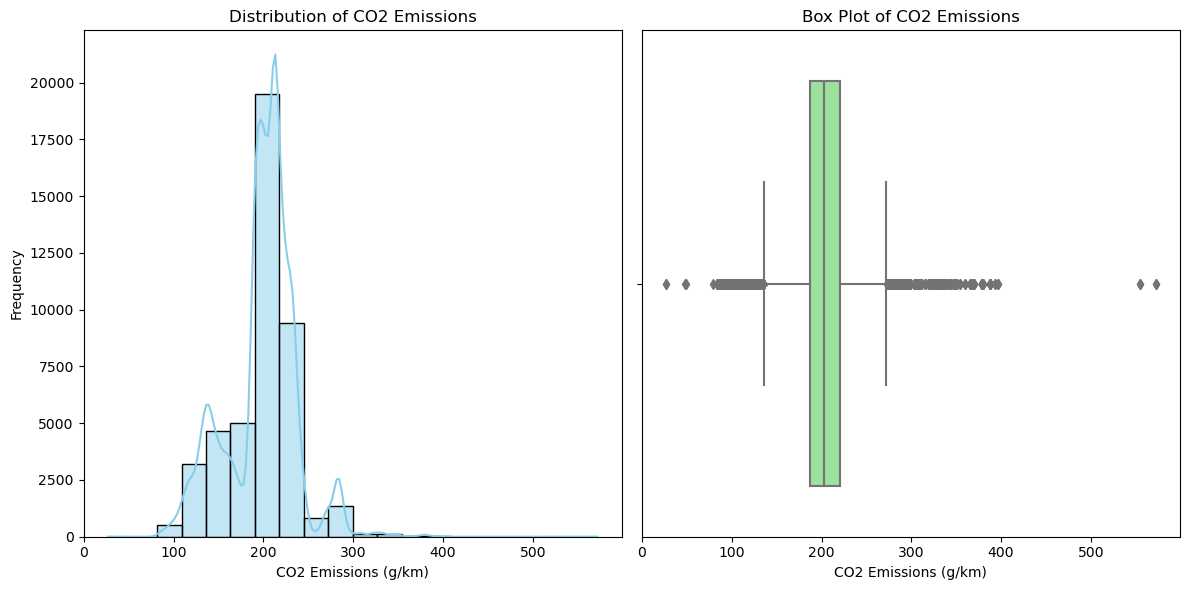

In [28]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Histogram of CO2 Emissions
sns.histplot(df['CO2 (g/km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
# Box plot of CO2 Emissions
plt.subplot(1, 2, 2)
sns.boxplot(x=df['CO2 (g/km)'], color='lightgreen')
plt.title('Box Plot of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')

# Show the plots
plt.tight_layout()
plt.show()

In [29]:
# Calculate the interquartile range (IQR)
Q1 = df['CO2 (g/km)'].quantile(0.25)
Q3 = df['CO2 (g/km)'].quantile(0.75)
IQR = Q3 - Q1
# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['CO2 (g/km)'] < lower_bound) | (df['CO2 (g/km)'] > upper_bound)]
# Calculate the number of outliers
num_outliers = len(outliers)
# Calculate the values of the lower and upper whiskers
lower_whisker = df['CO2 (g/km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['CO2 (g/km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)


Number of outliers: 5458
Lower whisker: 136.0
Upper whisker: 272.0


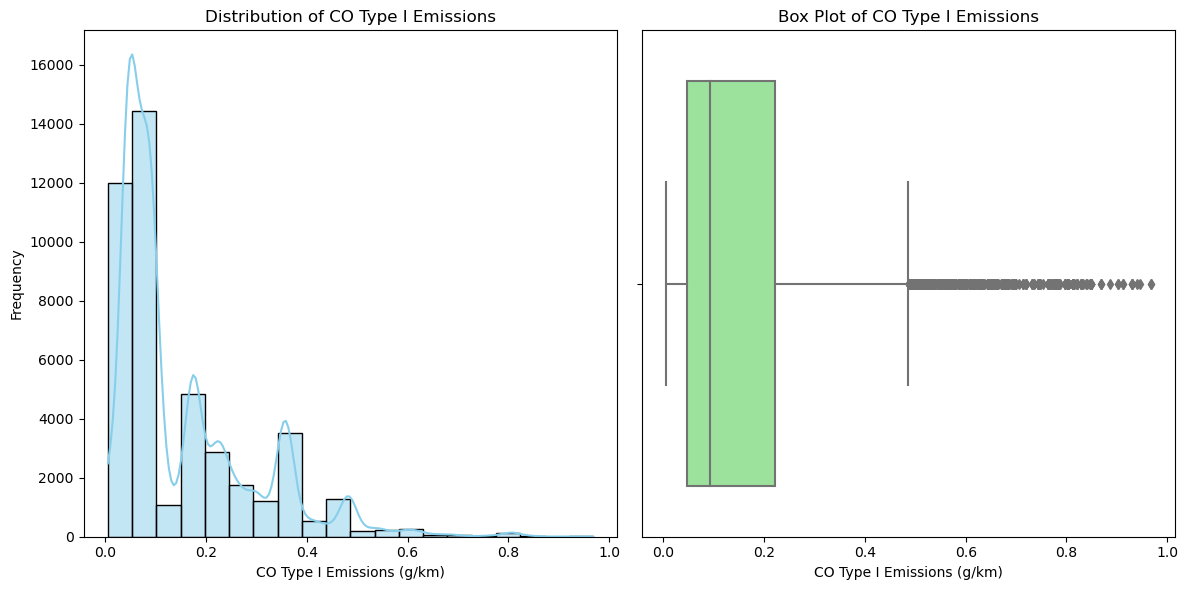

In [30]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Histogram of CO Type I Emissions
sns.histplot(df['CO type I (g/km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of CO Type I Emissions')
plt.xlabel('CO Type I Emissions (g/km)')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)

# Box plot of CO Type I Emissions
sns.boxplot(x=df['CO type I (g/km)'], color='lightgreen')
plt.title('Box Plot of CO Type I Emissions')
plt.xlabel('CO Type I Emissions (g/km)')

# Show the plots
plt.tight_layout()
plt.show()

In [31]:
# Calculate the interquartile range (IQR)
Q1 = df['CO type I (g/km)'].quantile(0.25)
Q3 = df['CO type I (g/km)'].quantile(0.75)
IQR = Q3 - Q1


# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['CO type I (g/km)'] < lower_bound) | (df['CO type I (g/km)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['CO type I (g/km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['CO type I (g/km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)


Number of outliers: 1009
Lower whisker: -0.21800000000000003
Upper whisker: 0.486


In [32]:
# Check for missing or NaN values
missing_values = df['CO type I (g/km)'].isnull().sum()
print("Number of missing or NaN values:", missing_values)


Number of missing or NaN values: 303


In [33]:
# Check for missing or NaN values
missing_values_hc = df['HC (g/km)'].isnull().sum()
print("Number of missing or NaN values in the 'HC (g/km)' column:", missing_values_hc)


Number of missing or NaN values in the 'HC (g/km)' column: 34447


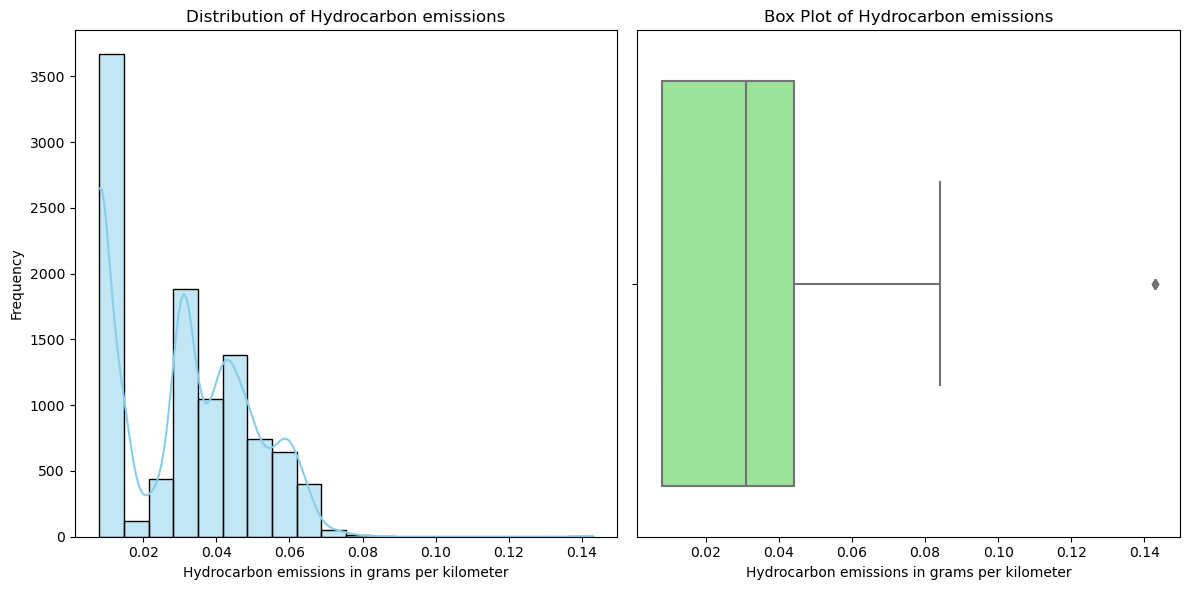

In [34]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Hydrocarbon emissions
plt.subplot(1, 2, 1)
sns.histplot(df['HC (g/km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Hydrocarbon emissions')
plt.xlabel('Hydrocarbon emissions in grams per kilometer')
plt.ylabel('Frequency')

# Box plot of Hydrocarbon emissions
plt.subplot(1, 2, 2)
sns.boxplot(x=df['HC (g/km)'], color='lightgreen')
plt.title('Box Plot of Hydrocarbon emissions')
plt.xlabel('Hydrocarbon emissions in grams per kilometer')

# Show the plots
plt.tight_layout()
plt.show()


In [35]:
# Calculate the interquartile range (IQR)
Q1 = df['HC (g/km)'].quantile(0.25)
Q3 = df['HC (g/km)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['HC (g/km)'] < lower_bound) | (df['HC (g/km)'] > upper_bound)]


# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['HC (g/km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['HC (g/km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Number of outliers: 4
Lower whisker: -0.04599999999999999
Upper whisker: 0.09799999999999999


In [36]:
# Check for missing or NaN values
missing_values_hc = df['NOX (g/km)'].isnull().sum()
print("Number of missing or NaN values in the 'NOX (g/km)' column:", missing_values_hc)


Number of missing or NaN values in the 'NOX (g/km)' column: 303


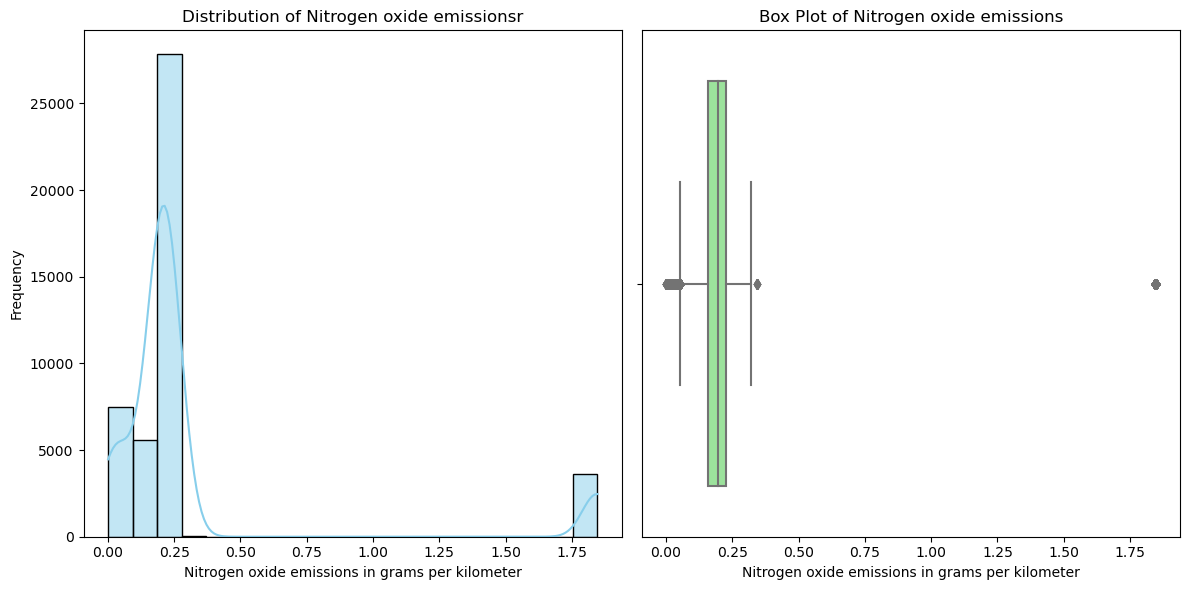

In [37]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Histogram of Nitrogen oxide emissions
sns.histplot(df['NOX (g/km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Nitrogen oxide emissionsr')
plt.xlabel('Nitrogen oxide emissions in grams per kilometer')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)

# Box plot of Nitrogen oxide emissions
sns.boxplot(x=df['NOX (g/km)'], color='lightgreen')
plt.title('Box Plot of Nitrogen oxide emissions')
plt.xlabel('Nitrogen oxide emissions in grams per kilometer')

# Show the plots
plt.tight_layout()
plt.show()

In [38]:
# Calculate the interquartile range (IQR)
Q1 = df['NOX (g/km)'].quantile(0.25)
Q3 = df['NOX (g/km)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['NOX (g/km)'] < lower_bound) | (df['NOX (g/km)'] > upper_bound)]
# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['NOX (g/km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['NOX (g/km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Number of outliers: 10426
Lower whisker: 0.05299999999999999
Upper whisker: 0.333


In [39]:
# Check for missing or NaN values
missing_values = df['HC+NOX (g/km)'].isnull().sum()
print("Number of missing or NaN values:", missing_values)

Number of missing or NaN values: 10659


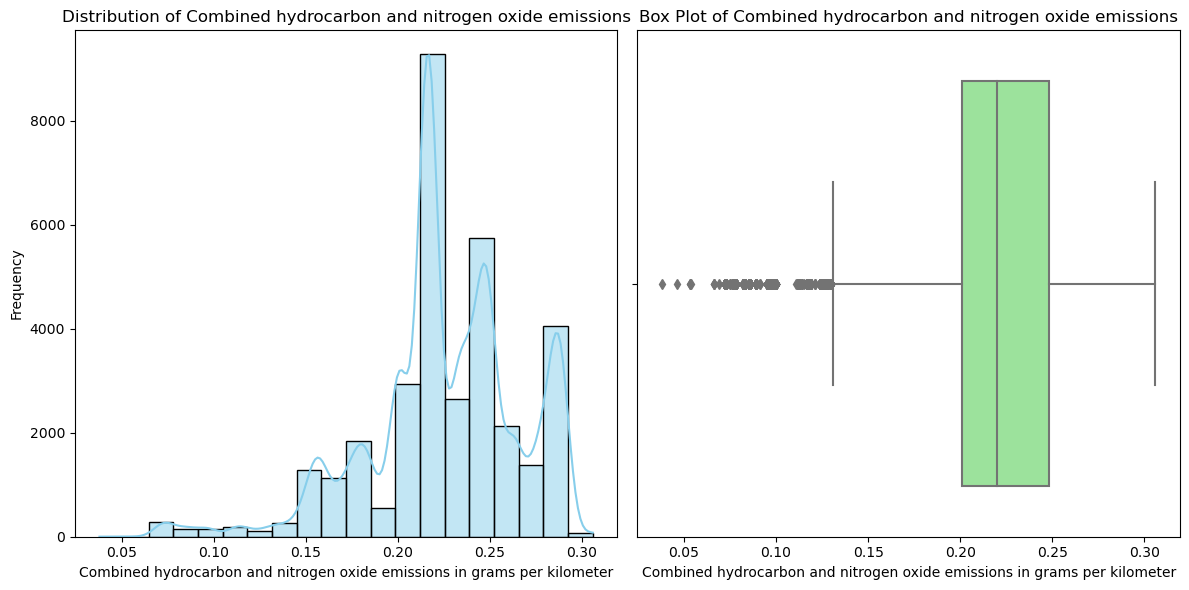

In [40]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Combined hydrocarbon and nitrogen oxide emissions
plt.subplot(1, 2, 1)
sns.histplot(df['HC+NOX (g/km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Combined hydrocarbon and nitrogen oxide emissions')
plt.xlabel('Combined hydrocarbon and nitrogen oxide emissions in grams per kilometer')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)

# Box plot of Combined hydrocarbon and nitrogen oxide emissions
sns.boxplot(x=df['HC+NOX (g/km)'], color='lightgreen')
plt.title('Box Plot of Combined hydrocarbon and nitrogen oxide emissions')
plt.xlabel('Combined hydrocarbon and nitrogen oxide emissions in grams per kilometer')

# Show the plots
plt.tight_layout()
plt.show()

In [41]:
# Calculate the interquartile range (IQR)
Q1 = df['HC+NOX (g/km)'].quantile(0.25)
Q3 = df['HC+NOX (g/km)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['HC+NOX (g/km)'] < lower_bound) | (df['HC+NOX (g/km)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['HC+NOX (g/km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['HC+NOX (g/km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Number of outliers: 883
Lower whisker: 0.13050000000000003
Upper whisker: 0.3185


In [42]:
# Check for missing or NaN values
missing_values = df['Particules (g/km)'].isnull().sum()
print("Number of missing or NaN values:", missing_values)

Number of missing or NaN values: 3142


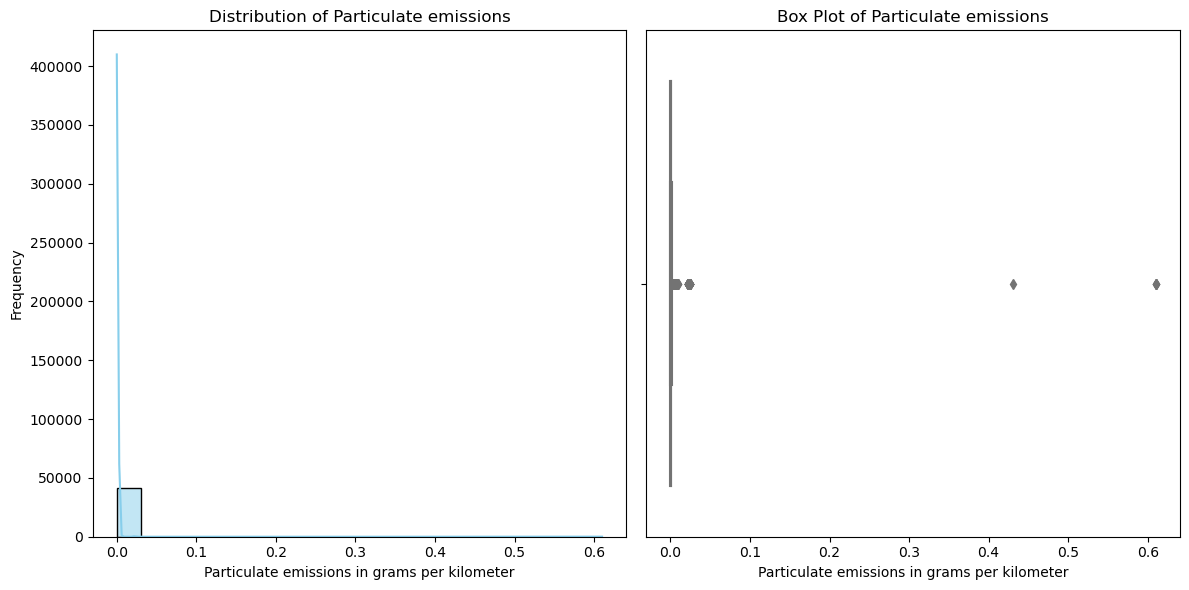

In [43]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Particulate emission
plt.subplot(1, 2, 1)
sns.histplot(df['Particules (g/km)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Particulate emissions')
plt.xlabel('Particulate emissions in grams per kilometer')
plt.ylabel('Frequency')

# Box plot of Particulate emission
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Particules (g/km)'], color='lightgreen')
plt.title('Box Plot of Particulate emissions')
plt.xlabel('Particulate emissions in grams per kilometer')

# Show the plots
plt.tight_layout()
plt.show()

In [44]:
# Calculate the interquartile range (IQR)
Q1 = df['Particules (g/km)'].quantile(0.25)
Q3 = df['Particules (g/km)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Particules (g/km)'] < lower_bound) | (df['Particules (g/km)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['Particules (g/km)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['Particules (g/km)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Number of outliers: 3696
Lower whisker: -0.0015
Upper whisker: 0.0025


In [45]:
# Check for missing or NaN values
missing_values = df['masse vide euro min (kg)'].isnull().sum()
print("Number of missing or NaN values:", missing_values)

Number of missing or NaN values: 0


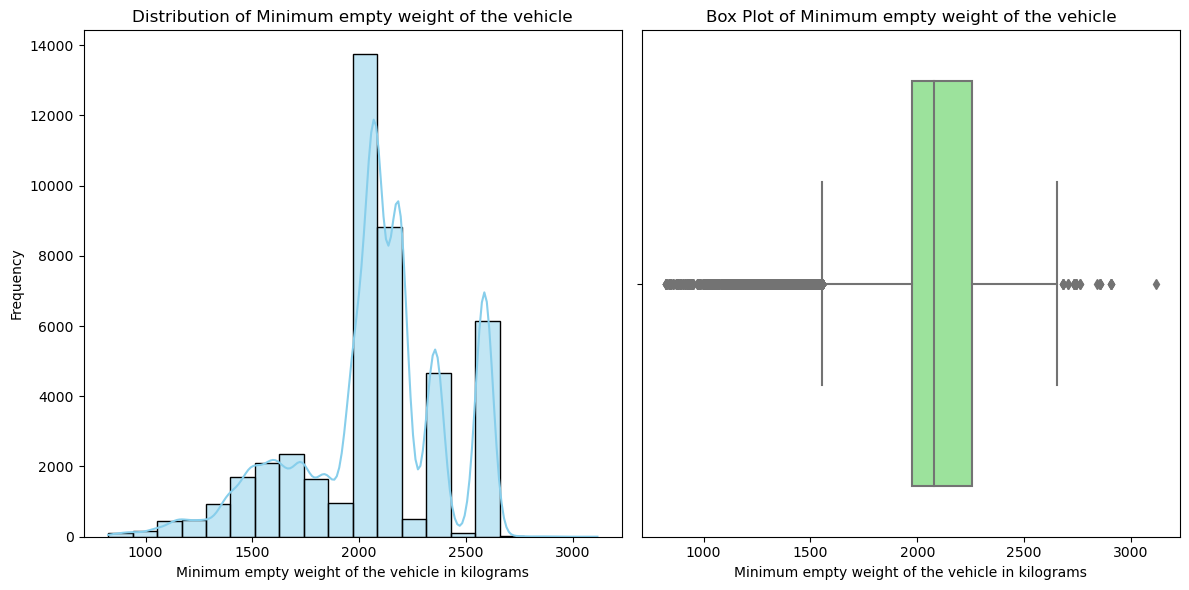

In [46]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Minimum empty weight of the vehicle
plt.subplot(1, 2, 1)
sns.histplot(df['masse vide euro min (kg)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Minimum empty weight of the vehicle')
plt.xlabel('Minimum empty weight of the vehicle in kilograms')
plt.ylabel('Frequency')

# Box plot of Minimum empty weight of the vehicle
plt.subplot(1, 2, 2)
sns.boxplot(x=df['masse vide euro min (kg)'], color='lightgreen')
plt.title('Box Plot of Minimum empty weight of the vehicle')
plt.xlabel('Minimum empty weight of the vehicle in kilograms')

# Show the plots
plt.tight_layout()
plt.show()

In [47]:
# Calculate the interquartile range (IQR)
Q1 = df['masse vide euro min (kg)'].quantile(0.25)
Q3 = df['masse vide euro min (kg)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['masse vide euro min (kg)'] < lower_bound) | (df['masse vide euro min (kg)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['masse vide euro min (kg)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['masse vide euro min (kg)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Number of outliers: 4397
Lower whisker: 1556.0
Upper whisker: 2676.0


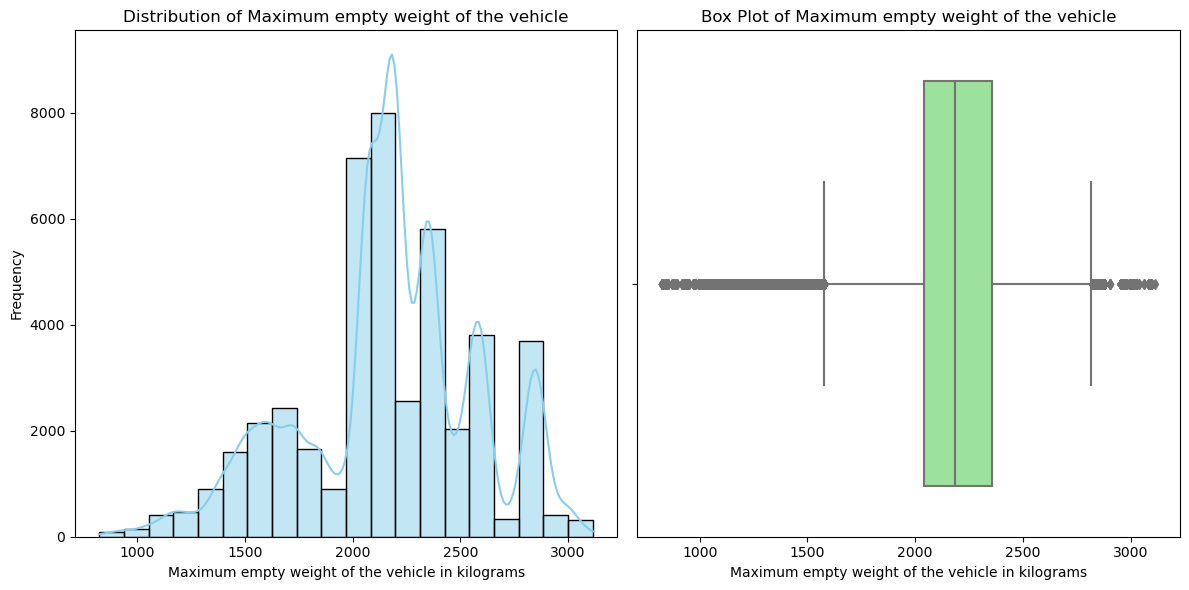

In [48]:
# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Histogram of Maximum empty weight of the vehicle
plt.subplot(1, 2, 1)
sns.histplot(df['masse vide euro max (kg)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Maximum empty weight of the vehicle')
plt.xlabel('Maximum empty weight of the vehicle in kilograms')
plt.ylabel('Frequency')

# Box plot of Maximum empty weight of the vehicle
plt.subplot(1, 2, 2)
sns.boxplot(x=df['masse vide euro max (kg)'], color='lightgreen')
plt.title('Box Plot of Maximum empty weight of the vehicle')
plt.xlabel('Maximum empty weight of the vehicle in kilograms')

# Show the plots
plt.tight_layout()
plt.show()

In [49]:
# Calculate the interquartile range (IQR)
Q1 = df['masse vide euro max (kg)'].quantile(0.25)
Q3 = df['masse vide euro max (kg)'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['masse vide euro max (kg)'] < lower_bound) | (df['masse vide euro max (kg)'] > upper_bound)]

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the values of the lower and upper whiskers
lower_whisker = df['masse vide euro max (kg)'].quantile(0.25) - 1.5 * IQR
upper_whisker = df['masse vide euro max (kg)'].quantile(0.75) + 1.5 * IQR

print("Number of outliers:", num_outliers)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

Number of outliers: 8240
Lower whisker: 1576.25
Upper whisker: 2822.25


In [50]:
# Create an empty dictionary to store the number of categories for each column
categories_counts = {}
# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is categorical (dtype 'object')
    if df[column].dtype == 'object':
        # Calculate the number of categories for the column
        categories_count = len(df[column].value_counts())
        # Store the number of categories in the dictionary
        categories_counts[column] = categories_count
# Print the number of categories for each categorical variable
for column, count in categories_counts.items():
    print(f"Number of categories in '{column}': {count}")


Number of categories in 'Marque': 51
Number of categories in 'Modèle dossier': 458
Number of categories in 'Modèle UTAC': 419
Number of categories in 'Désignation commerciale': 3582
Number of categories in 'CNIT': 44191
Number of categories in 'Type Variante Version (TVV)': 28781
Number of categories in 'Carburant': 13
Number of categories in 'Hybride': 2
Number of categories in 'Boîte de vitesse': 16
Number of categories in 'Champ V9': 13
Number of categories in 'Date de mise à jour': 3
Number of categories in 'Carrosserie': 10
Number of categories in 'gamme': 7


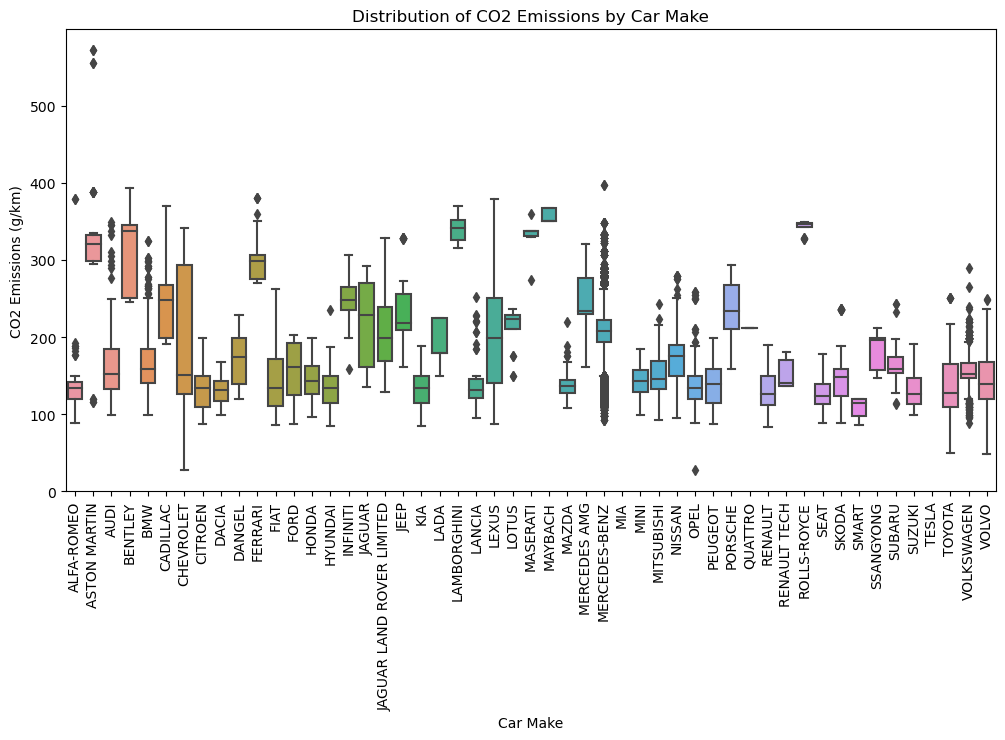

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot of CO2 emissions by Car Make
sns.boxplot(data=df, x='Marque', y='CO2 (g/km)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Distribution of CO2 Emissions by Car Make')
plt.xlabel('Car Make')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

In [53]:
# Outlier handling: winsoriz techique

from scipy.stats.mstats import winsorize


percent_to_trim = 0.05

# Perform Winsorization
df['column_winsorized'] = winsorize(df['column'], limits=percent_to_trim)




KeyError: 'column'